In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
agent1 = pd.read_csv('./data/blindfolded.csv')
agent2 = pd.read_csv('./data/fourNeighbour.csv')
agent3 = pd.read_csv('./data/basicInference.csv')
agent4 = pd.read_csv('./data/betterInference.csv')

agents = [agent1, agent2, agent3, agent4]

names = ['blindfolded', \
         'four_neighbour', \
         'example_inference_agent', \
         'better_inference_agent']

## Trajectory Length

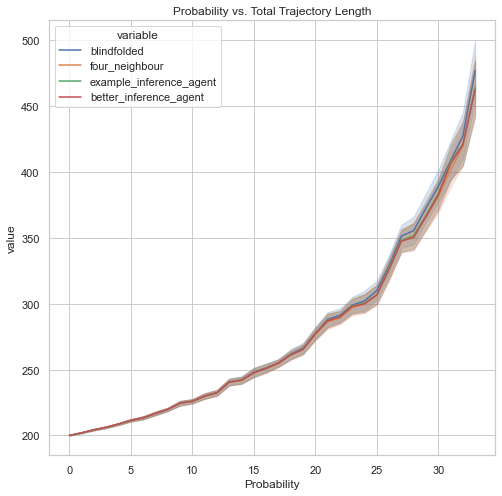

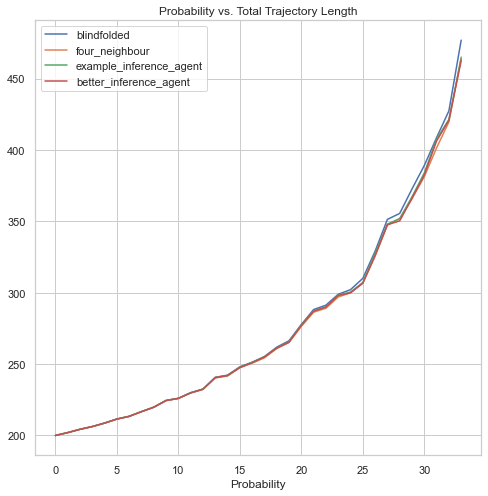

In [3]:
# smudged version
traj_length = agent1['Probability']
for agent, name in zip(agents, names):
    traj_length = pd.concat([traj_length, agent['Path Length'].rename(name)], axis=1)
traj_length = traj_length.melt('Probability')

plt.figure(figsize=(8, 8))
plt.title("Probability vs. Total Trajectory Length")
sns.lineplot(x=traj_length['Probability'], y=traj_length['value'], hue=traj_length['variable'])

# version with just averages
traj_length_means = [agent.groupby(['Probability'])['Path Length'].mean() for agent in agents]

plt.figure(figsize=(8, 8))
plt.title("Probability vs. Total Trajectory Length")
for traj_length_mean, name in zip(traj_length_means, names):
    sns.lineplot(data=traj_length_mean, x='Probability', y=traj_length_mean.values, label=name)
plt.legend()

## Number of Cells Processed

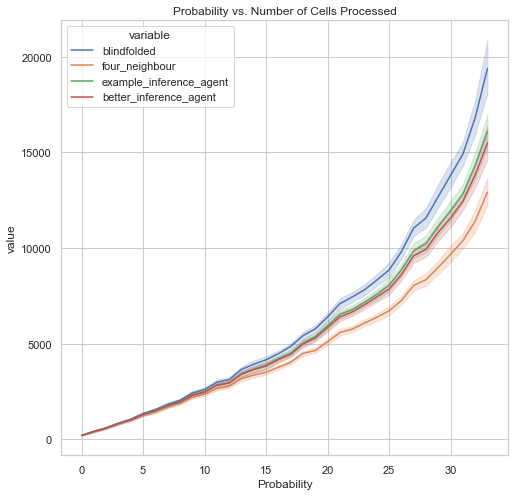

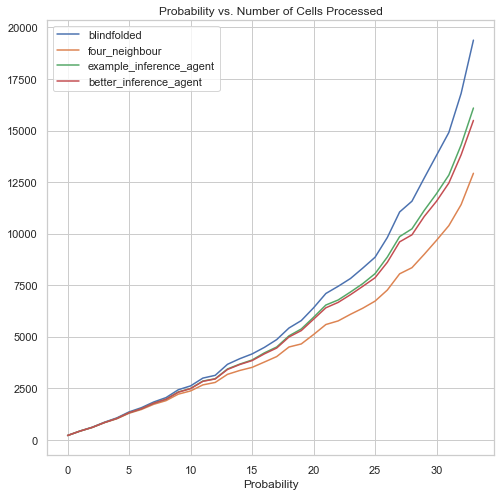

In [4]:
# smudged version
num_processed = agent1['Probability']
for agent, name in zip(agents, names):
    num_processed = pd.concat([num_processed, agent['Number of Cells Processed'].rename(name)], axis=1)
num_processed = num_processed.melt('Probability')

plt.figure(figsize=(8, 8))
plt.title("Probability vs. Number of Cells Processed")
sns.lineplot(x=num_processed['Probability'], y=num_processed['value'], hue=num_processed['variable'])

# version with just averages
num_processed_means = [agent.groupby(['Probability'])['Number of Cells Processed'].mean() for agent in agents]

plt.figure(figsize=(8, 8))
plt.title("Probability vs. Number of Cells Processed")
for num_processed_mean, name in zip(num_processed_means, names):
    sns.lineplot(data=num_processed_mean, x='Probability', y=num_processed_mean.values, label=name)
plt.legend()

## Number of Bumps

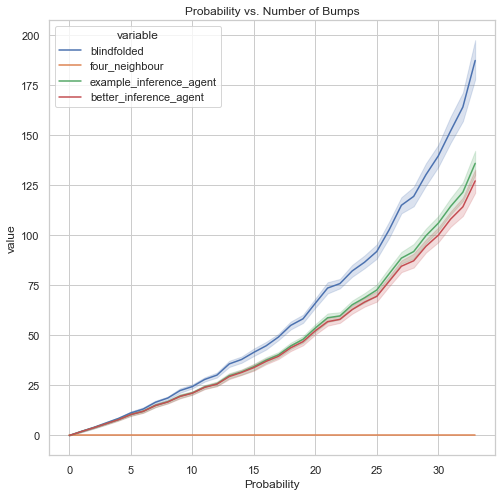

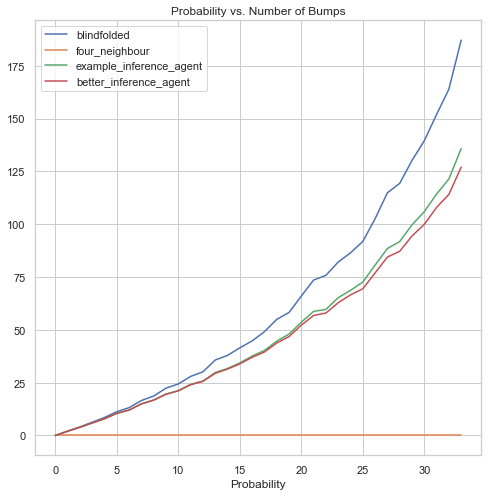

In [5]:
# smudged version
num_bumps = agent1['Probability']
for agent, name in zip(agents, names):
    num_bumps = pd.concat([num_bumps, agent['Number of Bumps'].rename(name)], axis=1)
num_bumps = num_bumps.melt('Probability')

plt.figure(figsize=(8, 8))
plt.title("Probability vs. Number of Bumps")
sns.lineplot(x=num_bumps['Probability'], y=num_bumps['value'], hue=num_bumps['variable'])

# version with just averages
num_bumps_means = [agent.groupby(['Probability'])['Number of Bumps'].mean() for agent in agents]

plt.figure(figsize=(8, 8))
plt.title("Probability vs. Number of Bumps")
for num_bumps_mean, name in zip(num_bumps_means, names):
    sns.lineplot(data=num_bumps_mean, x='Probability', y=num_bumps_mean.values, label=name)
plt.legend()

## Number of Planning Iterations

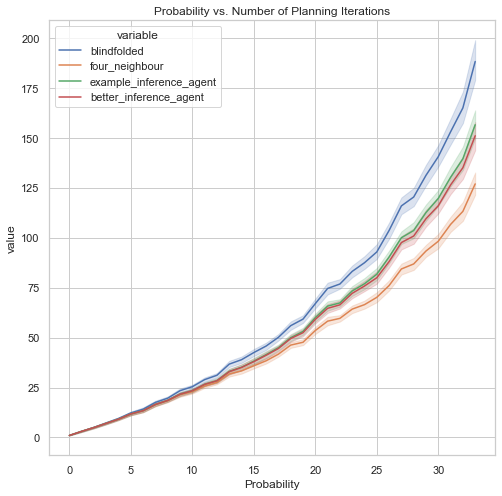

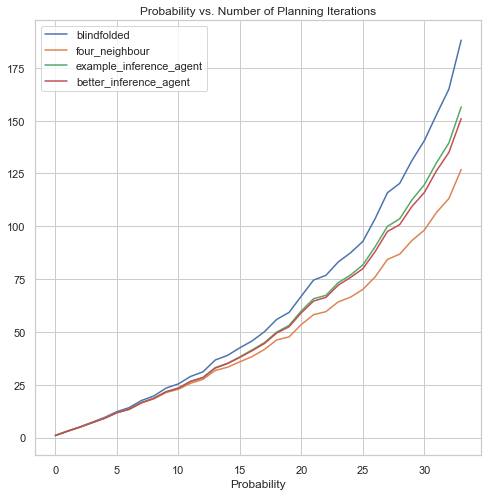

In [6]:
# smudged version
num_plans = agent1['Probability']
for agent, name in zip(agents, names):
    num_plans = pd.concat([num_plans, agent['Number of Planning Steps'].rename(name)], axis=1)
num_plans = num_plans.melt('Probability')

plt.figure(figsize=(8, 8))
plt.title("Probability vs. Number of Planning Iterations")
sns.lineplot(x=num_plans['Probability'], y=num_plans['value'], hue=num_plans['variable'])

# version with just averages
num_plans_means = [agent.groupby(['Probability'])['Number of Planning Steps'].mean() for agent in agents]

plt.figure(figsize=(8, 8))
plt.title("Probability vs. Number of Planning Iterations")
for num_plans_mean, name in zip(num_plans_means, names):
    sns.lineplot(data=num_plans_mean, x='Probability', y=num_plans_mean.values, label=name)
plt.legend()

## Number of Cells Determined

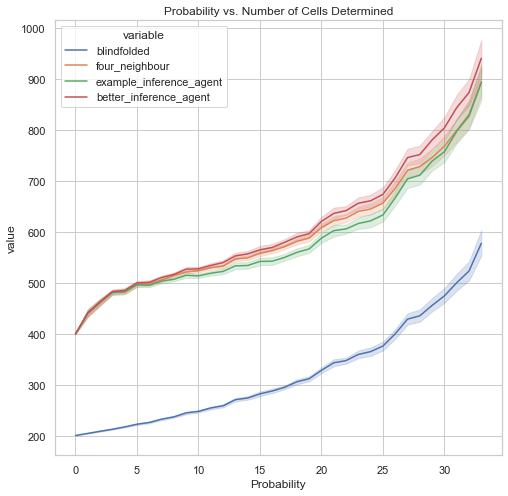

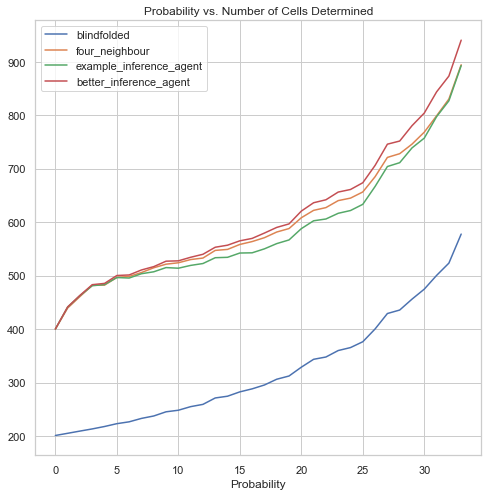

In [7]:
# smudged version
num_determined = agent1['Probability']
for agent, name in zip(agents, names):
    num_determined = pd.concat([num_determined, agent['Number of Cells Determined'].rename(name)], axis=1)
num_determined = num_determined.melt('Probability')

plt.figure(figsize=(8, 8))
plt.title("Probability vs. Number of Cells Determined")
sns.lineplot(x=num_determined['Probability'], y=num_determined['value'], hue=num_determined['variable'])

# version with just averages
num_determined_means = [agent.groupby(['Probability'])['Number of Cells Determined'].mean() for agent in agents]

plt.figure(figsize=(8, 8))
plt.title("Probability vs. Number of Cells Determined")
for num_determined_mean, name in zip(num_determined_means, names):
    sns.lineplot(data=num_determined_mean, x='Probability', y=num_determined_mean.values, label=name)
plt.legend()

## Runtime

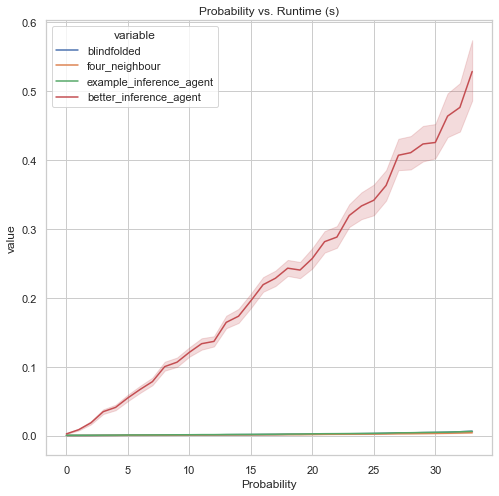

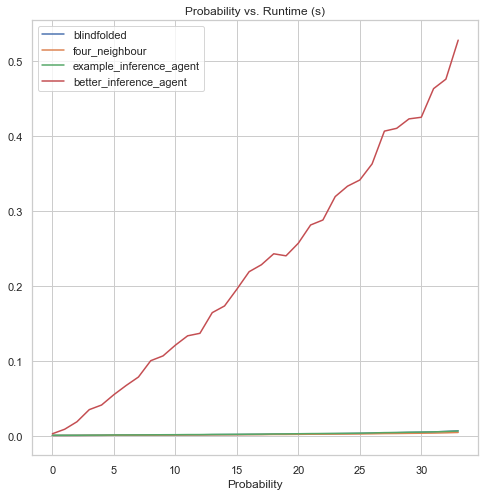

In [8]:
# smudged version
runtime = agent1['Probability']
for agent, name in zip(agents, names):
    runtime = pd.concat([runtime, agent['Runtime'].rename(name)], axis=1)
runtime = runtime.melt('Probability')

plt.figure(figsize=(8, 8))
plt.title("Probability vs. Runtime (s)")
sns.lineplot(x=runtime['Probability'], y=runtime['value'], hue=runtime['variable'])

# version with just averages
runtime_means = [agent.groupby(['Probability'])['Runtime'].mean() for agent in agents]

plt.figure(figsize=(8, 8))
plt.title("Probability vs. Runtime (s)")
for runtime_mean, name in zip(runtime_means, names):
    sns.lineplot(data=runtime_mean, x='Probability', y=runtime_mean.values, label=name)
plt.legend()